In [1]:
import pandas as pd
import pylab as pl
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.graphics.regressionplots import plot_regress_exog
%pylab inline
pl.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


# Data Wrangling

In [2]:
data = pd.read_csv('Final.csv')

In [3]:
data = data[data['population']>=100000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 17 to 914
Data columns (total 22 columns):
FID                   363 non-null float64
CBSAFP                363 non-null float64
cbsa                  363 non-null object
area_land             363 non-null float64
area_water            363 non-null float64
cbsa_name             363 non-null object
cbsa_state            363 non-null object
counties_per_state    363 non-null float64
population            363 non-null float64
population_2010       363 non-null float64
density               363 non-null float64
density_2010          363 non-null float64
total_emission        363 non-null float64
comm_emission         363 non-null float64
indus_emission        363 non-null float64
resid_emission        363 non-null float64
elect_emission        363 non-null float64
onroad_emission       363 non-null float64
cement_emission       363 non-null float64
aircraft_emission     363 non-null float64
airborne_emission     363 non-null fl

In [34]:
data[['total_emission','density','population']].corr()

,total_emission,density,population
total_emission,1.000000,0.597821,0.855691
density,0.597821,1.000000,0.729106
population,0.855691,0.729106,1.000000


In [5]:
# Standardization of data, might be useful later on:
data['standard_emission'] = (data['total_emission'] - data['total_emission'].mean())/data['total_emission'].std()
data['standard_density'] = (data['density'] - data['density'].mean())/data['density'].std()

# Visualizations

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


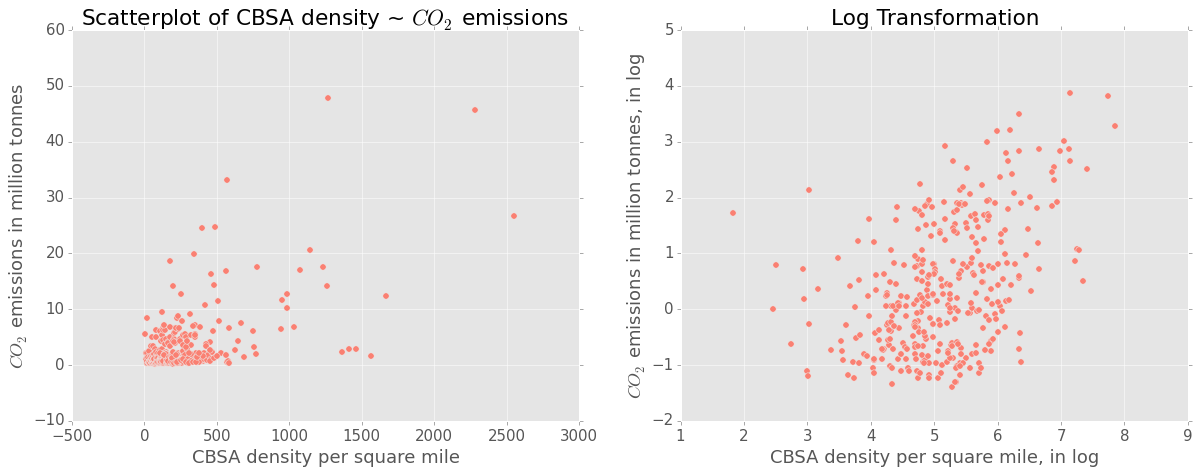

In [8]:
matplotlib.rcParams.update({'font.size': 15})
pl.figure(figsize=(20,7))
pl.subplot(121)
pl.scatter(data['density'],data['total_emission'], s=40, c='salmon')
pl.title(r'Scatterplot of CBSA density ~ $CO_2$ emissions')
pl.xlabel('CBSA density per square mile')
pl.ylabel(r'$CO_2$ emissions in million tonnes')

pl.subplot(122)
pl.scatter(np.log(data['density']),np.log(data['total_emission']), s=40, c='salmon')
pl.title(r'Log Transformation')
pl.xlabel('CBSA density per square mile, in log')
pl.ylabel(r'$CO_2$ emissions in million tonnes, in log')

plt.savefig("Scatter_emission_dens.png")

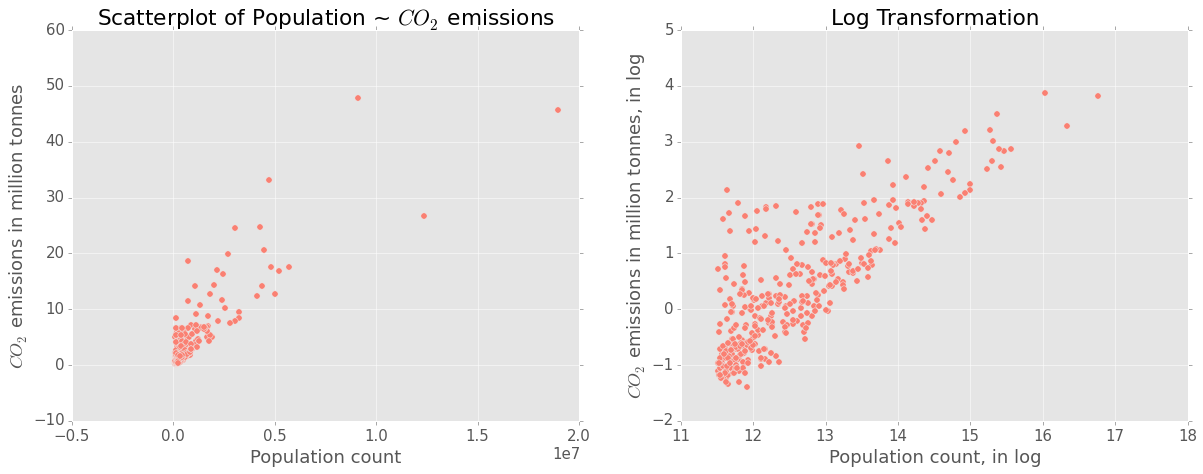

In [18]:
matplotlib.rcParams.update({'font.size': 15})
pl.figure(figsize=(20,7))
pl.subplot(121)
pl.scatter(data['population'],data['total_emission'], s=40, c='salmon')
pl.title(r'Scatterplot of Population ~ $CO_2$ emissions')
pl.xlabel('Population count')
pl.ylabel(r'$CO_2$ emissions in million tonnes')

pl.subplot(122)
pl.scatter(np.log(data['population']),np.log(data['total_emission']), s=40, c='salmon')
pl.title(r'Log Transformation')
pl.xlabel('Population count, in log')
pl.ylabel(r'$CO_2$ emissions in million tonnes, in log')

plt.savefig("Scatter_pop.png")

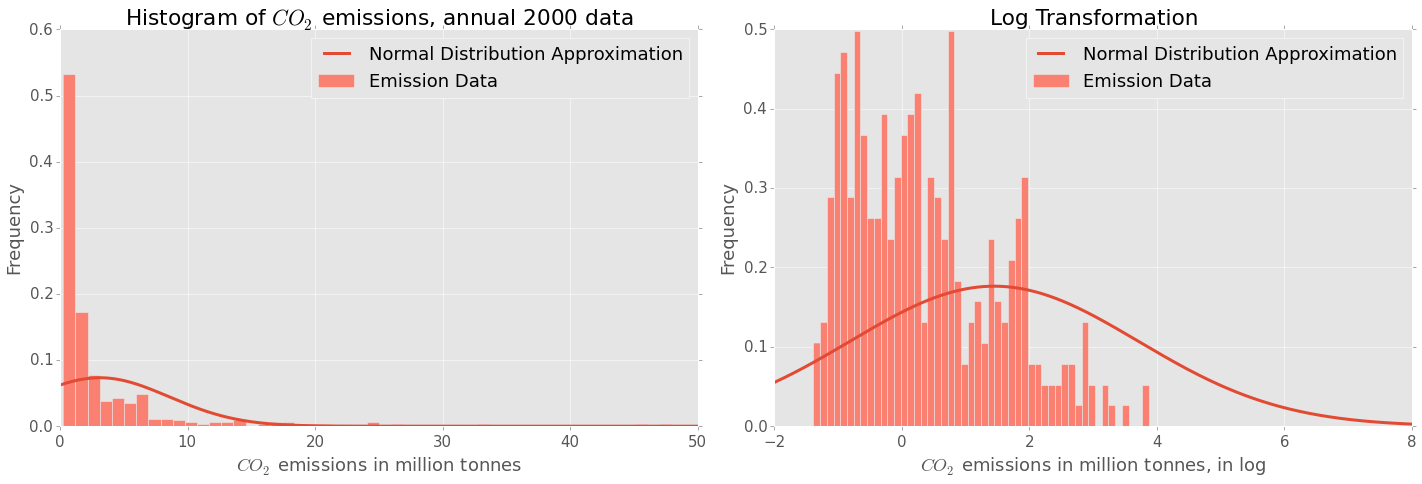

In [19]:
pl.figure(figsize=(20,7))
m, sd = stats.norm.fit(data['total_emission'])
x = np.linspace(0,50,1000)
y = stats.norm.pdf(x, m, sd)

pl.subplot(121)
bins, hist, patches = pl.hist(data['total_emission'].values, bins=50, normed=True, label='Emission Data', color='salmon')
pl.plot(x,y, linewidth=3, label='Normal Distribution Approximation')
pl.xlabel(r'$CO_2$ emissions in million tonnes')
pl.ylabel('Frequency')
pl.title(r'Histogram of $CO_2$ emissions, annual 2000 data')
pl.legend()

pl.subplot(122)
m, sd = stats.norm.fit(np.power(np.log(data['total_emission']),2))
x = np.linspace(-2,8,1000)
y = stats.norm.pdf(x, m, sd)
bins, hist, patches = pl.hist(np.log(data['total_emission'].values), bins=50, normed=True, label='Emission Data', 
                              color='salmon')
pl.plot(x,y, linewidth=3, label='Normal Distribution Approximation')
pl.xlabel(r'$CO_2$ emissions in million tonnes, in log')
pl.ylabel('Frequency')
pl.title(r'Log Transformation')
pl.legend()


plt.tight_layout()
plt.savefig("Histo_emission.png")

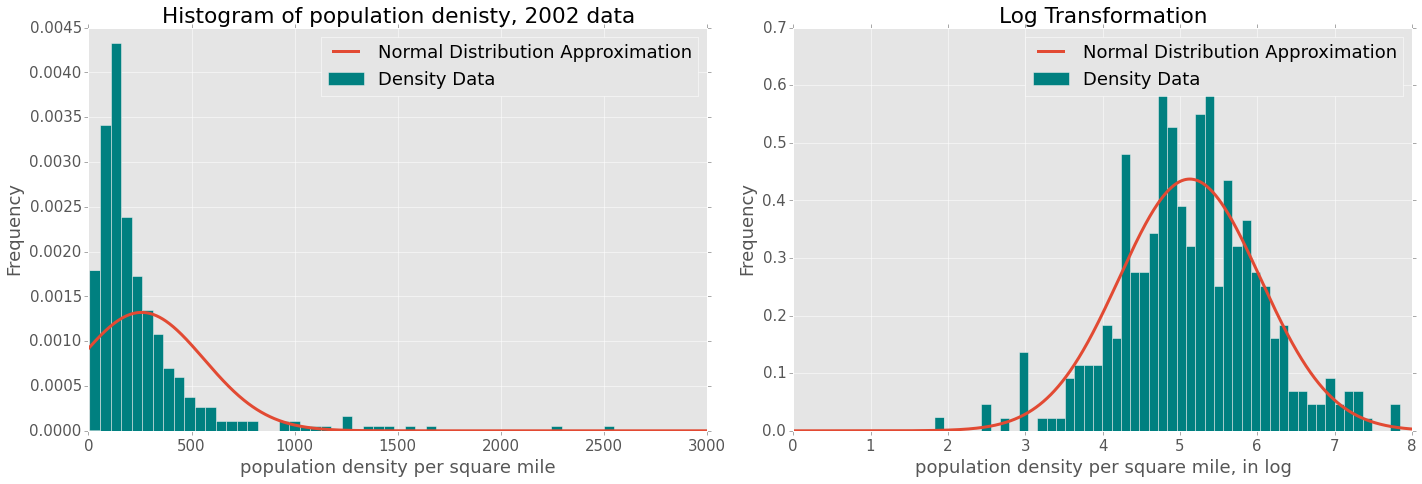

In [20]:
pl.figure(figsize=(20,7))
m, sd = stats.norm.fit(data['density'])
x = np.linspace(0,3000,1000)
y = stats.norm.pdf(x, m, sd)

pl.subplot(121)
bins, hist, patches = pl.hist(data['density'].values, bins=50, normed=True, label='Density Data', color='teal')
pl.plot(x,y, linewidth=3, label='Normal Distribution Approximation')
pl.xlabel(r'population density per square mile')
pl.ylabel('Frequency')
pl.title(r'Histogram of population denisty, 2002 data')
#pl.xlim(0,20)
pl.legend()

pl.subplot(122)
m, sd = stats.norm.fit(np.log(data['density']))
x = np.linspace(0,8,1000)
y = stats.norm.pdf(x, m, sd)
bins, hist, patches = pl.hist(np.log(data['density'].values), bins=50, normed=True, label='Density Data', color='teal')
pl.plot(x,y, linewidth=3, label='Normal Distribution Approximation')
pl.xlabel(r'population density per square mile, in log')
pl.ylabel('Frequency')
pl.title(r'Log Transformation')
#pl.xlim(0,20)
pl.legend()


plt.tight_layout()
plt.savefig("Histo_dend.png")

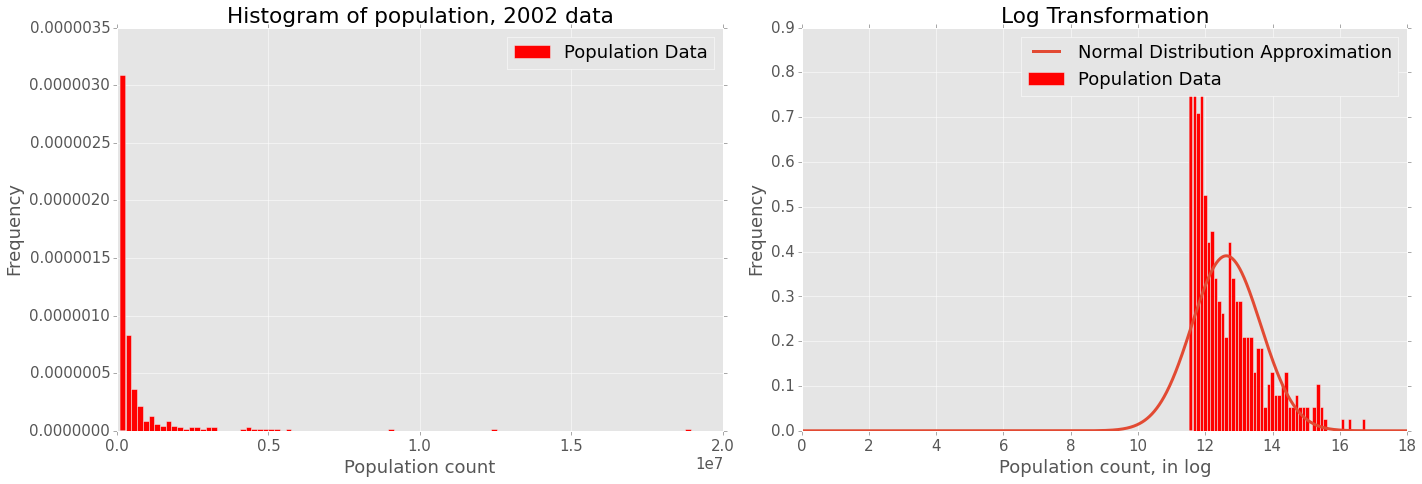

In [33]:
pl.figure(figsize=(20,7))
m, sd = stats.norm.fit(data['density'])
x = np.linspace(0,data['population'].max(),1000)
y = stats.norm.pdf(x, m, sd)

pl.subplot(121)
bins, hist, patches = pl.hist(data['population'].values, bins=100, normed=True, label='Population Data', color='red')
#pl.plot(x,y, linewidth=3, label='Normal Distribution Approximation')
pl.xlabel(r'Population count')
pl.ylabel('Frequency')
pl.title(r'Histogram of population, 2002 data')
#pl.xlim(0,20)
pl.legend()

pl.subplot(122)
m, sd = stats.norm.fit(np.log(data['population']))
x = np.linspace(0,18,1000)
y = stats.norm.pdf(x, m, sd)
bins, hist, patches = pl.hist(np.log(data['population'].values), bins=50, normed=True, label='Population Data', color='red')
pl.plot(x,y, linewidth=3, label='Normal Distribution Approximation')
pl.xlabel(r'Population count, in log')
pl.ylabel('Frequency')
pl.title(r'Log Transformation')
#pl.xlim(0,20)
pl.legend()


plt.tight_layout()
plt.savefig("Histo_pop.png")

# Regression Models

### Density

In [11]:
model = smf.ols(formula ='np.log(total_emission) ~ np.log(density)', data=data, missing='drop').fit()

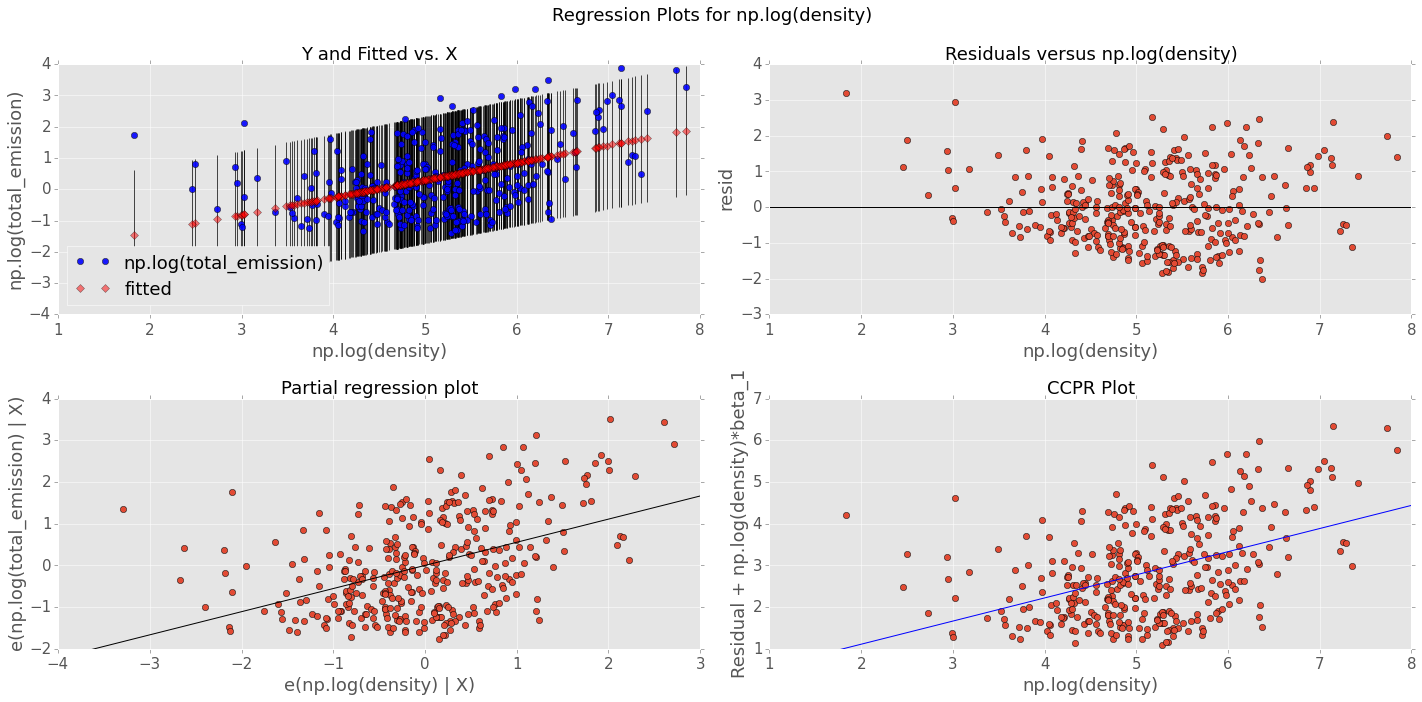

In [12]:
fig = plt.figure(figsize=(20,10))
fig = plot_regress_exog(model, 'np.log(density)', fig=fig)
plt.savefig("Regression.png")

In [13]:
print model.summary()

                              OLS Regression Results                              
Dep. Variable:     np.log(total_emission)   R-squared:                       0.196
Model:                                OLS   Adj. R-squared:                  0.194
Method:                     Least Squares   F-statistic:                     87.87
Date:                    Sun, 15 Nov 2015   Prob (F-statistic):           7.83e-19
Time:                            12:31:26   Log-Likelihood:                -524.65
No. Observations:                     363   AIC:                             1053.
Df Residuals:                         361   BIC:                             1061.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
In

### Density + Population

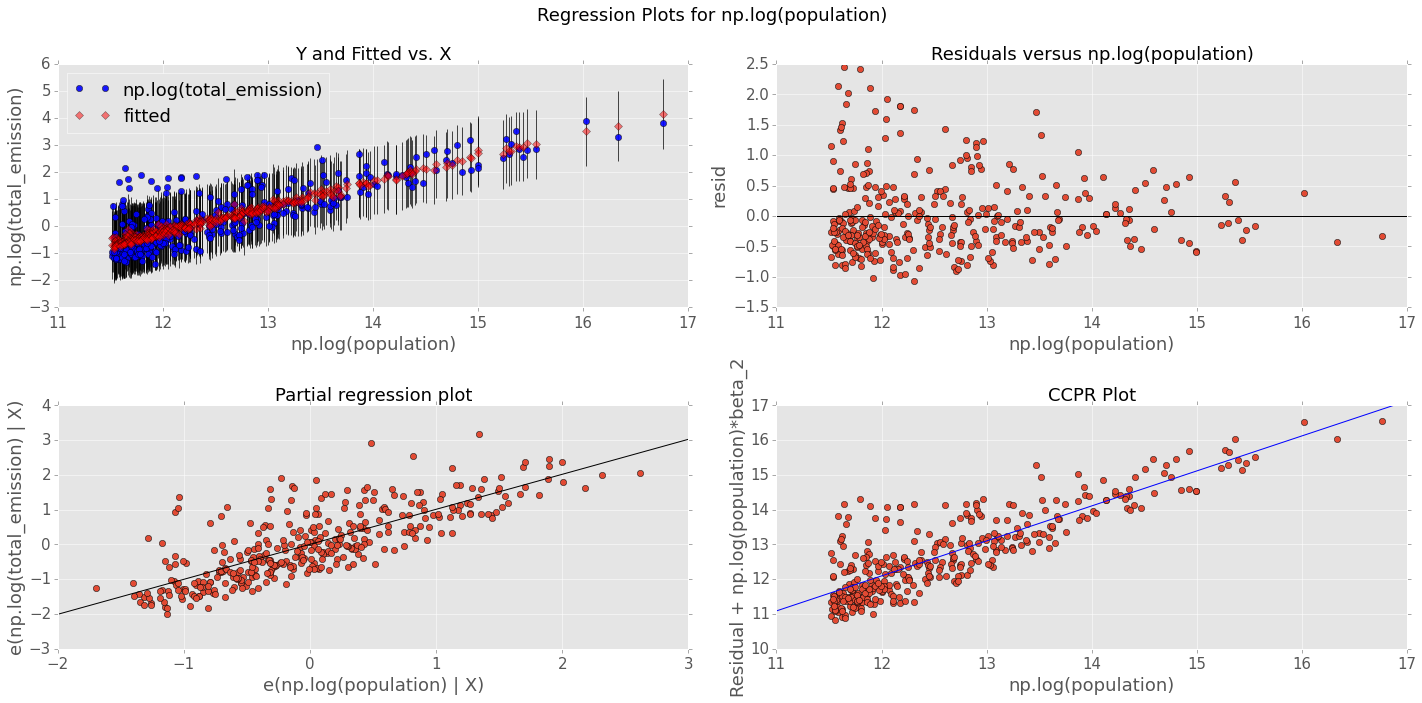

In [15]:
model = smf.ols(formula ='np.log(total_emission) ~ np.log(density) + np.log(population)', data=data, missing='drop').fit()
fig = plt.figure(figsize=(20,10))
fig = plot_regress_exog(model, 'np.log(population)', fig=fig)
plt.savefig("Regression.png")

In [16]:
print model.summary()

                              OLS Regression Results                              
Dep. Variable:     np.log(total_emission)   R-squared:                       0.690
Model:                                OLS   Adj. R-squared:                  0.689
Method:                     Least Squares   F-statistic:                     401.4
Date:                    Sun, 15 Nov 2015   Prob (F-statistic):           2.20e-92
Time:                            14:51:47   Log-Likelihood:                -351.38
No. Observations:                     363   AIC:                             708.8
Df Residuals:                         360   BIC:                             720.4
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------

# Just Population

In [48]:
model = smf.ols(formula ='np.log(total_emission) ~ np.log(population)', data=data, missing='drop').fit()
print model.summary()

                              OLS Regression Results                              
Dep. Variable:     np.log(total_emission)   R-squared:                       0.682
Model:                                OLS   Adj. R-squared:                  0.681
Method:                     Least Squares   F-statistic:                     774.2
Date:                    Sun, 15 Nov 2015   Prob (F-statistic):           7.87e-92
Time:                            18:15:01   Log-Likelihood:                -356.25
No. Observations:                     363   AIC:                             716.5
Df Residuals:                         361   BIC:                             724.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------

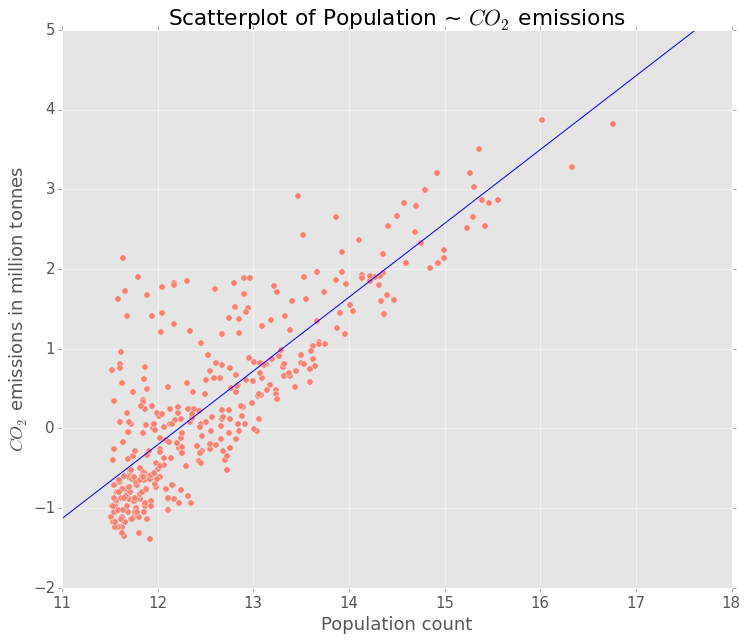

In [53]:
from statsmodels.graphics.api import abline_plot
fig, ax = pl.subplots(figsize=(12,10))
ax.scatter(np.log(data['population']),np.log(data['total_emission']), s=40, c='salmon')
abline_plot(model_results=model, ax=ax)
pl.title(r'Scatterplot of Population ~ $CO_2$ emissions')
ax.set_xlabel('Population count')
ax.set_ylabel(r'$CO_2$ emissions in million tonnes')

# Top ten CBSAs

In [38]:
data.sort('total_emission',ascending=False)[['cbsa','total_emission']][:10]

,cbsa,total_emission
907,"Chicago-Naperville-Elgin, IL-IN-WI",47.92
913,"New York-Newark-Jersey City, NY-NJ-PA",45.61
891,"Houston-The Woodlands-Sugar Land, TX",33.18
914,"Los Angeles-Long Beach-Anaheim, CA",26.65
883,"Atlanta-Sandy Springs-Roswell, GA",24.72
856,"Minneapolis-St. Paul-Bloomington, MN-WI",24.55
903,"Detroit-Warren-Dearborn, MI",20.55
835,"St. Louis, MO-IL",19.94
731,"Baton Rouge, LA",18.55
897,"Washington-Arlington-Alexandria, DC-VA-MD-WV",17.56


In [39]:
data['emission_percapita'] = data['total_emission']/data['population']
data.sort('emission_percapita',ascending=False)[['cbsa','emission_percapita']][:10]

,cbsa,emission_percapita
99,"Farmington, NM",0.000074
749,"Weirton-Steubenville, WV-OH",0.000051
17,"Flagstaff, AZ",0.000048
255,"Pine Bluff, AR",0.000047
797,"Monroe, MI",0.000037
776,"Homosassa Springs, FL",0.000035
567,"Terre Haute, IN",0.000034
443,"Lake Charles, LA",0.000032
576,"Longview, TX",0.000031
620,"Macon, GA",0.000028
